In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score





/var/folders/3c/pb1mvv954893vlh3_4cdhtww0000gn/T/ipykernel_9964/1112673610.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('wines_SPA.csv')

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
767,Martinet,Clos Martinet,2015,4.4,296,Espana,Priorato,65.40,Priorat Red,4.0,3.0
3982,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0
7282,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Espana,Rias Baixas,16.78,Albarino,3.0,3.0
4127,Clos Pons,Roc Nu,2011,4.2,420,Espana,Costers del Segre,23.95,Red,4.0,3.0
605,El Regajal,Galia Clos Santuy,2016,4.5,32,Espana,Castilla y Leon,89.00,Red,4.0,3.0


In [5]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [6]:
df['body']=df.body.fillna(df.body.mean())

In [7]:
df['acidity']=df.acidity.fillna(df.acidity.mean())
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['year'] = df['year'].fillna(df['type'].mode()[0])
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [8]:
df.value_counts('wine')
df.value_counts('winery')
df.value_counts('num_reviews')
df.value_counts('acidity')
df.dtypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country']= le.fit_transform(df['country'])
df['region']= le.fit_transform(df['region'])
df['winery']= le.fit_transform(df['wine'])
df['wine']= le.fit_transform(df['wine'])
df['type']= le.fit_transform(df['type'])
df['year']= le.fit_transform(df['year'])
df['body'] = df['body'].astype('int64')
df['acidity'] = df['acidity'].astype('int64')
df['rating'] = df['rating'].astype('int64')
df['price'] = df['price'].astype('int64')
df.dtypes

winery         int64
wine           int64
year           int64
rating         int64
num_reviews    int64
country        int64
region         int64
price          int64
type           int64
body           int64
acidity        int64
dtype: object

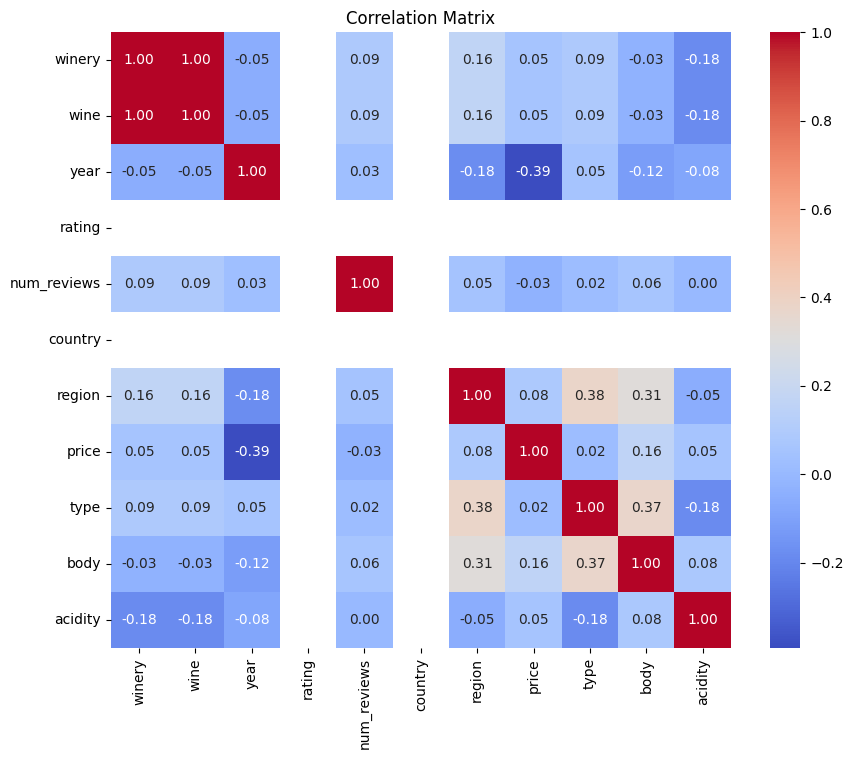

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
df.head()
df=df.drop(columns=['rating','country'],axis=1)


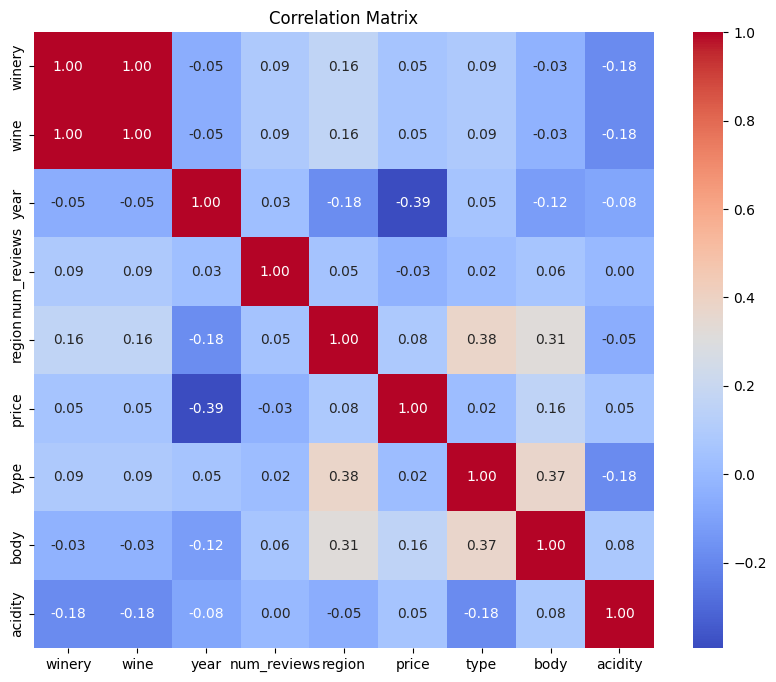

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()